$\textbf{Note.}$ $\hspace{2mm}$ I do not use any library for regression. But it is fine to use as long as your answer is correct.

$\textbf{Problem 1.}$ $\hspace{2mm}$ Exercise 4.8 from the textbook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('examination.txt', sep='\t')

X = data[['P1', 'P2']]
X1 = data[['P1']]
X2 = data[['P2']]
Y = data['F']


$\textbf{a)}$ $\hspace{2mm}$ For each of the three models, draw the $P-R$ plot. Identify all unusual observations (by number) and classify as outlier, high-leverage point, and/or influential observation.

$\textbf{Answer:}$ $\hspace{2mm}$

Model 1: $$F = \beta_0 + \beta_1 P_1 +\epsilon$$
Model 2: $$F = \beta_0 + \beta_2 P_2 + \epsilon$$
Model 3: $$F = \beta_0 + \beta_1 P_1 + \beta_2 P_2 + \epsilon$$



$P-R$ plot is the plot of the potential function against the residual function.

A common mistake: Design matrix $X$ and the data matrix $X$ are not the same. We need to create a column of 1's for the intercept in the design matrix $X$ to calculate the hat matrix $H$. We call design matrices X_model_i in the following code.

In [6]:
X_model_1 = np.column_stack((np.ones(len(Y)),X1))  
X_model_2 = np.column_stack((np.ones(len(Y)),X2))
X_model_3 = np.column_stack((np.ones(len(Y)),X))

Note that the projection matrix $P$, also called hat matrix $H$, is $$P = X (X^T X)^{-1} X^T.$$

Let's calculate the potential function for each model. Note that $P$ in $P-R$ plot is not the projection matrix.

The potential function is $$\dfrac{p_{ii}}{1 - p_{ii}}.$$

In [7]:
Projection_model_1 = X_model_1 @ np.linalg.pinv(X_model_1.T @ X_model_1) @ X_model_1.T
Projection_model_2 = X_model_2 @ np.linalg.pinv(X_model_2.T @ X_model_2) @ X_model_2.T
Projection_model_3 = X_model_3 @ np.linalg.pinv(X_model_3.T @ X_model_3) @ X_model_3.T

p_i_model_1 = np.diag(Projection_model_1)
p_i_model_2 = np.diag(Projection_model_2)
p_i_model_3 = np.diag(Projection_model_3)

Potential_function_model_1 = np.divide(p_i_model_1, 1 - p_i_model_1)
Potential_function_model_2 = np.divide(p_i_model_2, 1 - p_i_model_2)
Potential_function_model_3 = np.divide(p_i_model_3, 1 - p_i_model_3)

Remind that $\hat{Y} = PY,$ where $P$ is the projection matrix. The residual function is

$$\dfrac{(1 + p) d_{i}^{2}}{(1 - p_{ii}^{2})(1 - d_{i}^{2})},$$ 
where

$$d_i = \dfrac{e_i}{\sqrt(SSE)} \hspace{2mm}.$$

$p$ is the number of predictors here. $p=1$, $p=1$ and $p=2$ for the models 1,2 and 3, respectively.

We first calculate residual vector of $e_i$'s and $SSE$ for each model. 

d_model_i is the vector $(d_1, d_2, ..., d_n)$ of the model $i$ in the following code. 

In [8]:
Y_hat_model_1 = Projection_model_1 @ Y
Y_hat_model_2 = Projection_model_2 @ Y
Y_hat_model_3 = Projection_model_3 @ Y

residual_model_1 = Y-Y_hat_model_1
residual_model_2 = Y-Y_hat_model_2
residual_model_3 = Y-Y_hat_model_3

SSE_model_1 = np.sum(np.multiply(residual_model_1, residual_model_1))
SSE_model_2 = np.sum(np.multiply(residual_model_2, residual_model_2))
SSE_model_3 = np.sum(np.multiply(residual_model_3, residual_model_3))

d_model_1 = np.divide(residual_model_1, np.sqrt(SSE_model_1))
d_model_2 = np.divide(residual_model_2, np.sqrt(SSE_model_2))
d_model_3 = np.divide(residual_model_3, np.sqrt(SSE_model_3))


Residual_function_model_1 = (1 + 1) * np.multiply(np.multiply(d_model_1, d_model_1), 
                                              np.divide(1 - np.multiply(p_i_model_1, p_i_model_1),
                                                        np.multiply(1 - np.multiply(p_i_model_1, p_i_model_1),
                                                                    1 - np.multiply(d_model_1, d_model_1))))
Residual_function_model_2 = (1 + 1) * np.multiply(np.multiply(d_model_2, d_model_2), 
                                              np.divide(1 - np.multiply(p_i_model_2, p_i_model_2),
                                                        np.multiply(1 - np.multiply(p_i_model_2, p_i_model_2),
                                                                    1 - np.multiply(d_model_2, d_model_2))))
Residual_function_model_3 = (1 + 2) * np.multiply(np.multiply(d_model_3, d_model_3), 
                                              np.divide(1 - np.multiply(p_i_model_3, p_i_model_3),
                                                        np.multiply(1 - np.multiply(p_i_model_3, p_i_model_3),
                                                                    1 - np.multiply(d_model_3, d_model_3))))                                                                    

Let's plot them labeling points by numbers.

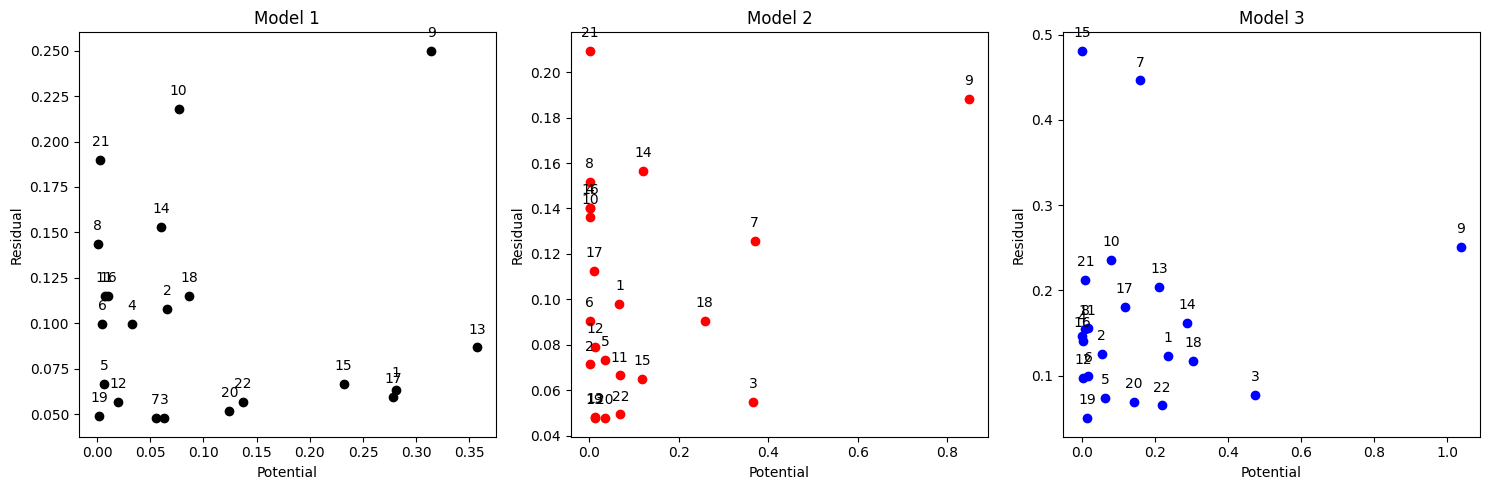

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(Residual_function_model_1, Potential_function_model_1, color='black')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 1')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (Residual_function_model_1[i], Potential_function_model_1[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplot(1, 3, 2)
plt.scatter(Residual_function_model_2, Potential_function_model_2, color='red')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 2')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (Residual_function_model_2[i], Potential_function_model_2[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.subplot(1, 3, 3)
plt.scatter(Residual_function_model_3, Potential_function_model_3, color='blue')
plt.xlabel('Potential')
plt.ylabel('Residual')
plt.title('Model 3')
for i, txt in enumerate(range(1, len(data) + 1)):
    plt.annotate(txt, (Residual_function_model_3[i], Potential_function_model_3[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

MODEL 1

High leverage points: 9, 10, 21, 14, 8.
Outliers: 9, 13, 1, 17, 15.
Influential points: 9.

MODEL 2

High leverage points: 9, 10, 21, 14, 8.
Outliers: 9.
Influencial points: 9.

MODEL 3

High leverage points: 9, 7, 15.
Outliers: 9.
Influencial points: 9.

$\textbf{b)}$ $\hspace{2mm}$ What model would you use to predict the final score F?

$\textbf{Answer:}$ $\hspace{2mm}$

Model 2 and 3 have the least outliers. Model 3 has the least number of high leverage points, while Model 2 is simplier than Model 3. Since they produce similar results, we would use the simpler one, Model 2. 